<img src='../img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='50%'></img>

<br>

<hr>

# 2.5.3 Copernicus Sentinel-3 SLSTR NRT - Aerosol Optical Depth (AOD) - Level 2

The [Copernicus Sentinel-3 SLSTR Near-Real-Time (NRT) Aerosol Optical Depth (AOD)](https://navigator.eumetsat.int/product/EO:EUM:DAT:0306?query=SLSTR%20Level%202%20Aerosol%20Optical%20Depth%20in%20NRT%20-%20Sentinel-3&s=advanced) product quantifies the abundance of all aerosol particles suspended in the air and monitors their global distribution and long-range transport, at the scale of 9.5 x 9.5 km<sup>2</sup>. Aerosol Optical Depth is often used as a proxy for the amount of aerosols in the air.

The NRT S3 AOD product is only applicable during daytime. The current version of the product is considered as `'preliminary operational'` over ocean surfaces, and `'demonstrational'` over land surfaces.

All these observations are made available in less than three hours from the SLSTR observation sensing time.

The following workflow is based on an example of `Sentinel-3 Near Real Time SLSTR AOD` data in August 2023 in order analyse the amount of aerosols in the air during the Californian fires.
 

#### This module has the following outline:
* [1 - Load Sentinel-3 SLSTR NRT AOD data](#load_cal)
* [2 - Extract AOD variables](#extract_cal)
* [3 - Visualize AOD Ocean and AOD land information](#visualize_cal)

<hr>

#### Load required libraries

In [7]:
import xarray as xr
import requests
import io

import os
os.environ['PROJ_LIB'] = '/opt/conda/share/proj'

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
%run ../helper_functions.ipynb

In [3]:
base_url = "https://s3.waw3-2.cloudferro.com/swift/v1/act6/"

latmin = 30
latmax = 50
lonmin = 15
lonmax = 40

<hr>

## <a id='load'></a>Load Sentinel-3 SLSTR Near-Real-Time AOD data

The Near-Real-Time Sentinel-3 Aerosol Optical Depth data are disseminated in `netCDF`. `netCDF` data can be loaded with the Python library [xarray](http://xarray.pydata.org/en/stable/) and the function `xr.open_dataset()`. 

You see that the data file contains two `dimensions`:
* `columns` and
* `rows`.

It further contains an long list of `data variables`, including:
* `AOD_550`,
* `AOD_550_uncertainty`,
* `AOD_550_Ocean_NonFiltered`,
* `AOD_550_Land_Experimental_PostFiltered`,
...

A data file also contains a set of `attributes`, which give you more information about the data file and the data it contains, e.g the `start_time` and `stop_time` or the `product_name`.

In [8]:
# Define the data path
data_path = "data/s3/aod/S3A_SL_2_AOD____20230823T084601_20230823T085100_20230823T105938_0299_102_278______MAR_O_NR_003.SEN3/S3A_SL_2_AOD____20230823T084601_20230823T085100_20230823T105938_0299_102_278______MAR_O_NR_003.SEN3/"
filename = "NRT_AOD.nc"

# Stream the file content
response = requests.get(base_url + data_path + filename, stream=True)

# Ensure the request is successful
if response.status_code == 200:
    # Convert the streamed content into a file-like object
    file_obj = io.BytesIO(response.content)

    # Open the file with xarray as a NetCDF dataset
    aod_xr = xr.open_dataset(file_obj)
    print(f"File opened")
else:
    print(f"Failed to fetch file: {response.status_code}")

File opened


In [9]:
aod_xr

<xarray.Dataset> Size: 8MB
Dimensions:                                (rows: 211, columns: 157)
Coordinates:
    longitude                              (rows, columns) float32 133kB ...
Dimensions without coordinates: rows, columns
Data variables: (12/57)
    AOD_550                                (rows, columns) float32 133kB ...
    AOD_550_Land                           (rows, columns) float32 133kB ...
    AOD_550_uncertainty                    (rows, columns) float32 133kB ...
    AOD_550_uncertainty_Land               (rows, columns) float32 133kB ...
    AOD_550_Merged_OceanLand               (rows, columns) float32 133kB ...
    AOD_670                                (rows, columns) float32 133kB ...
    ...                                     ...
    scattering_angle_oblique               (rows, columns) float32 133kB ...
    cloud_fraction_nadir                   (rows, columns) float32 133kB ...
    cloud_fraction_oblique                 (rows, columns) float32 133kB ...
    aod_quality_flags                      (rows, columns) uint16 66kB ...
    SLN_L1b_quality_flags                  (rows, columns) uint32 133kB ...
    SLO_L1b_quality_flags                  (rows, columns) uint32 133kB ...
Attributes: (12/17)
    title:                  Surface directional Reflectance, retrieved and de...
    comment:                 
    netCDF_version:         4.2 of Jul  5 2012 17:07:43 $
    product_name:           S3A_SL_2_AOD____20230823T084601_20230823T085100_2...
    institution:            MAR
    source:                 IPF-SL-2-AOD 04.00
    ...                     ...
    absolute_orbit_number:  39136
    start_time:             2023-08-23T08:46:00.756335Z
    stop_time:              2023-08-23T08:51:00.142342Z
    processing_baseline:    AOD_NRT.003.00.00
    track_offset:           105
    start_offset:           1467

### <a id='extract'></a>Extract Aerosol Optical Depth variables

The next step is to extract the variables of interest. Let us select the following two variables:
* `AOD_550`: it is the Aerosol Optical Depth at 550nm. (*Note: it only covers ocean surfaces.*)
* `AOD_550_Land_Experimental_PostFiltered`: it is the Aerosol Optical Depth at 550nm. (*Note: it only covers land surfaces.*)

Both `xarray.DataArrays` have two dimensions (`rows` and `columns`) and the following attributes, which provide additional information about the variables:
* `long_name`
* `standard_name`
* `valid_min`
* `valid_max`
* `coordinates`

In [10]:
aod_ocean = aod_xr.AOD_550
aod_land = aod_xr.AOD_550_Land

print(aod_ocean)
print(' ')
print(aod_land)

<xarray.DataArray 'AOD_550' (rows: 211, columns: 157)> Size: 133kB
[33127 values with dtype=float32]
Coordinates:
    longitude  (rows, columns) float32 133kB ...
Dimensions without coordinates: rows, columns
Attributes:
    long_name:      Aerosol optical thickness at 550 nm - Best quality (post-...
    standard_name:  atmosphere_optical_thickness_due_to_ambient_aerosol
    valid_min:      0.0
    valid_max:      4.001
 
<xarray.DataArray 'AOD_550_Land' (rows: 211, columns: 157)> Size: 133kB
[33127 values with dtype=float32]
Coordinates:
    longitude  (rows, columns) float32 133kB ...
Dimensions without coordinates: rows, columns
Attributes:
    long_name:      Aerosol optical thickness at 550 nm - Only over land surf...
    standard_name:  atmosphere_optical_thickness_due_to_ambient_aerosol
    valid_min:      0.0
    valid_max:      4.001


You can also load `latitude` and `longitude`, `start_time` and `stop_time` information, which can be used later for visualizing the variables.

In [14]:
lat_nc = aod_xr.latitude
lon_nc = aod_xr.longitude

print(lat_nc)
print(' ')
print(lon_nc)

<xarray.DataArray 'latitude' (rows: 211, columns: 157)> Size: 133kB
[33127 values with dtype=float32]
Coordinates:
    longitude  (rows, columns) float32 133kB ...
Dimensions without coordinates: rows, columns
Attributes:
    long_name:      Latitude at pixel centre
    standard_name:  latitude
    units:          degrees_north
    valid_min:      -90.0
    valid_max:      90.0
 
<xarray.DataArray 'longitude' (rows: 211, columns: 157)> Size: 133kB
[33127 values with dtype=float32]
Coordinates:
    longitude  (rows, columns) float32 133kB ...
Dimensions without coordinates: rows, columns
Attributes:
    long_name:      Longitude at pixel centre
    standard_name:  longitude
    units:          degrees_east
    valid_min:      -180.0
    valid_max:      180.0


In [15]:
start_time = aod_xr.start_time

stop_time = aod_xr.stop_time
stop_time

'2023-08-23T08:51:00.142342Z'

### <a id='visualize'></a> Visualize AOD Ocean and AOD Land variables

The final step is to visualize both variables, Aerosol Optical Depth over ocean and land together in one plot. You can use matplotlib's function `pcolormesh` for it.

Let us define a function called [visualize_s3_aod](../functions.ipynb#visualize_s3_aod) which visualizes both AOD variables together onto a map. The function takes the following keyword arguments (kwargs):
* `aod_ocean`: DataArray with AOD values over ocean
* `aod_land`: DataArray with AOD values over land
* `latitude`: DataArray with latitude information
* `longitude`: DataArray with longitude information
* `title`: Title of the plot
* `unit`: Unit of AOD
* `vmin` and `vmax`: Minimum and maximum values to be displayed on the map
* `color_scale`: Color scale the data shall be represented
* `projection`: Projection of the map

Now, let us apply the function [visualize_s3_aod](../functions.ipynb#visualize_s3_aod) to visualize both variables, `AOD Ocean` and `AOD Land`.

/opt/conda/envs/myenv/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:1768: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)
/opt/conda/envs/myenv/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:1768: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)


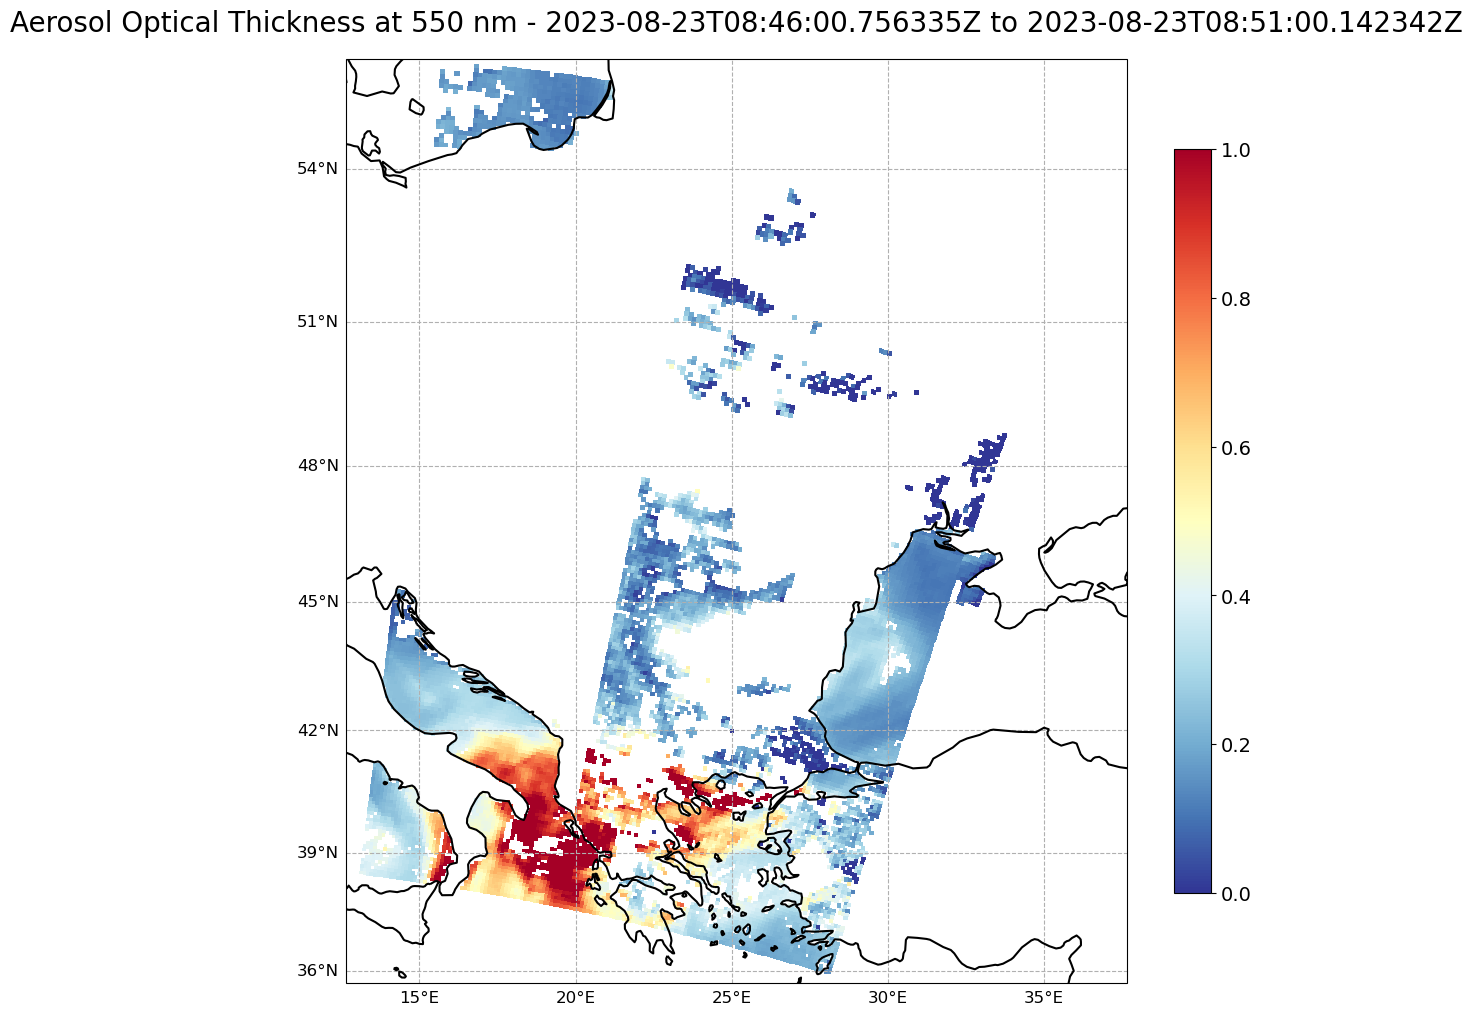

In [16]:
visualize_s3_aod(aod_ocean=aod_ocean, 
                 aod_land=aod_land, 
                 latitude=lat_nc, 
                 longitude=lon_nc, 
                 title=f'Aerosol Optical Thickness at 550 nm - {start_time} to {stop_time}', 
                 unit=' ', 
                 vmin=0.,
                 vmax=1.0,
                 color_scale=cm.RdYlBu_r,
                 projection=ccrs.Mercator())

<br>

### Additional informations

This notebook was adapted from: [https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere/-/blob/master/90_workshops/202307_EUM_wildfire_short_course/02_Sentinel-3_SLSTR_L2_AOD.ipynb?ref_type=heads](https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere/-/blob/master/90_workshops/202307_EUM_wildfire_short_course/02_Sentinel-3_SLSTR_L2_AOD.ipynb?ref_type=heads)

<br>

<hr>

<p><img src='../img/copernicus_logo.png' align='left' alt='Logo EU Copernicus' width='25%'></img></p>
<br clear=left>
<p style="text-align:left;">This project is licensed under the <a href="../LICENSE">MIT License</a> <span style="float:right;"><a href="https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a>